# 轉換率計算；並依不同類別來看轉換率變化

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

## 讀取檔案

In [54]:
df = pd.read_csv('bank-additional-full.csv',sep=';')

In [55]:
df.shape

(41188, 21)

In [56]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 編碼 – 文字轉數字

In [57]:
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


# 轉換率計算

In [58]:
print(f'total conversions: {df.conversion.sum()} out of {df.shape[0]}')
print(f'conversion rate: {df.conversion.sum()/ df.shape[0] * 100:0.2f}%')


total conversions: 4640 out of 41188
conversion rate: 11.27%


# 轉換率計算 by 年紀 

In [59]:
df.groupby('age')['conversion'].sum()

age
17     2
18    12
19    20
20    23
21    29
      ..
91     0
92     3
94     0
95     0
98     2
Name: conversion, Length: 78, dtype: int64

In [60]:
df.groupby('age')['conversion'].count()

age
17      5
18     28
19     42
20     65
21    102
     ... 
91      2
92      4
94      1
95      1
98      2
Name: conversion, Length: 78, dtype: int64

In [61]:
conversions_by_age = df.groupby('age')['conversion'].sum() / df.groupby('age')['conversion'].count() * 100
conversions_by_age

age
17     40.000000
18     42.857143
19     47.619048
20     35.384615
21     28.431373
         ...    
91      0.000000
92     75.000000
94      0.000000
95      0.000000
98    100.000000
Name: conversion, Length: 78, dtype: float64

### 繪圖

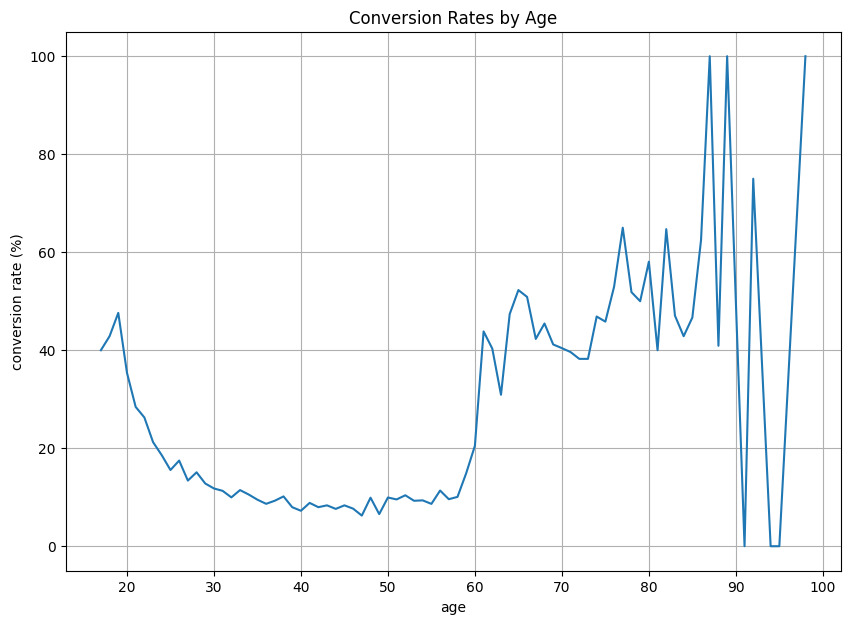

In [62]:
conversions_by_age.plot(
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age'
)

plt.xlabel('age')
plt.ylabel('conversion rate (%)')
plt.show()

# 轉換率計算 by 年紀分組

此種寫法 age 最小值 17 歲不會被算入

In [63]:
df['age_group'] = pd.cut(df['age'],
                         [df['age'].min(), 30, 40, 50, 60, 70, df['age'].max()],
                         labels=['<30', '30-40', '40-50', '50-60', '60-70', '70+'])
df['age_group']

0        50-60
1        50-60
2        30-40
3        30-40
4        50-60
         ...  
41183      70+
41184    40-50
41185    50-60
41186    40-50
41187      70+
Name: age_group, Length: 41188, dtype: category
Categories (6, object): ['<30' < '30-40' < '40-50' < '50-60' < '60-70' < '70+']

此種寫法 age 最小值 17 歲 **會被** 算入

In [64]:
df['age_group'] = pd.cut(df['age'],
                         [df['age'].min()-1, 30, 40, 50, 60, 70, df['age'].max()+1],
                         labels=['<30', '30-40', '40-50', '50-60', '60-70', '70+'])
df['age_group']

0        50-60
1        50-60
2        30-40
3        30-40
4        50-60
         ...  
41183      70+
41184    40-50
41185    50-60
41186    40-50
41187      70+
Name: age_group, Length: 41188, dtype: category
Categories (6, object): ['<30' < '30-40' < '40-50' < '50-60' < '60-70' < '70+']

In [65]:
conversion_series = df.groupby('age_group', observed=True)['conversion']

In [66]:
conversion_series.sum()

age_group
<30      1124
30-40    1597
40-50     837
50-60     668
60-70     212
70+       202
Name: conversion, dtype: int64

In [67]:
conversion_series.count()

age_group
<30       7383
30-40    16385
40-50    10240
50-60     6270
60-70      488
70+        422
Name: conversion, dtype: int64

In [68]:
conversions_by_age_group = conversion_series.sum() / conversion_series.count() * 100
conversions_by_age_group

age_group
<30      15.224164
30-40     9.746720
40-50     8.173828
50-60    10.653907
60-70    43.442623
70+      47.867299
Name: conversion, dtype: float64

### 繪圖

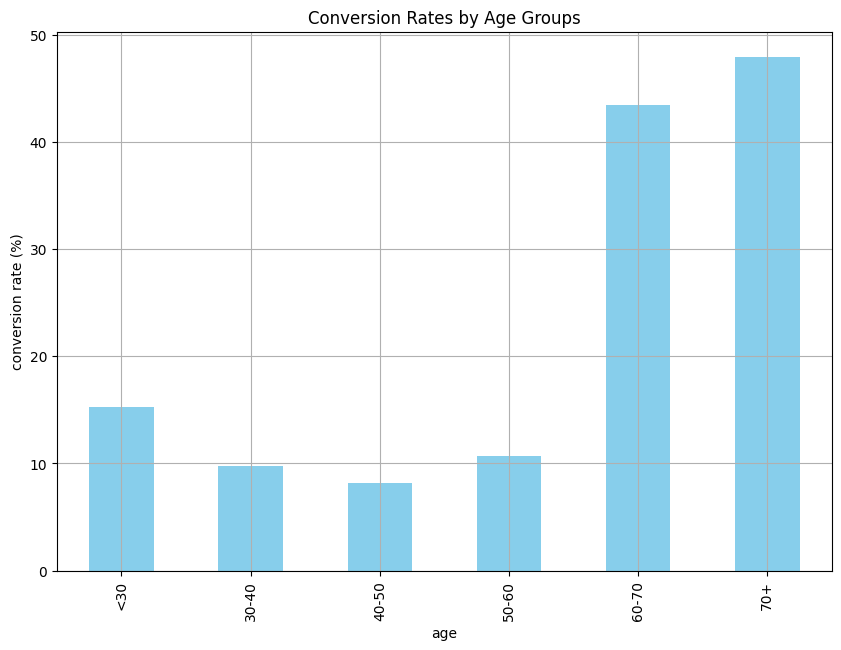

In [69]:
conversions_by_age_group.plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

plt.xlabel('age')
plt.ylabel('conversion rate (%)')
plt.show()

### 問題：如何均分成三組？

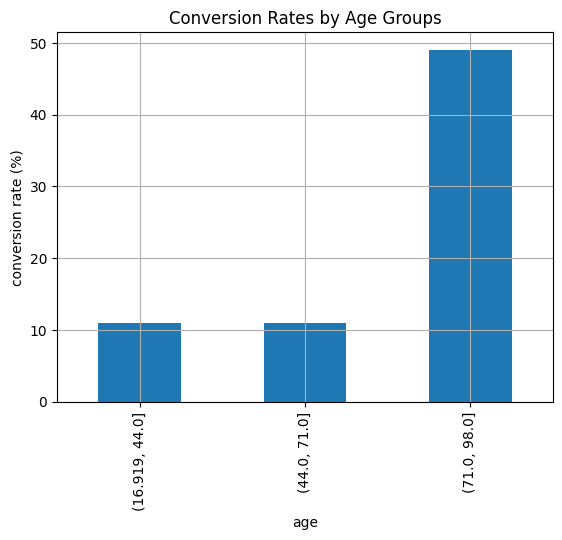

In [70]:
# bins (int): Defines the number of equal-width bins in the range of `x`. The range of `x` is extended by .1% on each side to include the minimum and maximum values of `x`.
df["age_group"] = pd.cut(df['age'], 3)
conversion_series = df.groupby('age_group', observed=True)['conversion']

conversions_by_age_group = conversion_series.sum() / conversion_series.count() * 100

conversions_by_age_group.plot(
    kind='bar',
    grid=True,
    title='Conversion Rates by Age Groups'
)

plt.xlabel('age')
plt.ylabel('conversion rate (%)')
plt.show()

## 轉換與非轉換情況計算 by 婚姻狀況 

方法 1

In [71]:
conversions_by_marital_status_df = df.groupby(['marital', 'y'])['conversion'].count().unstack()
conversions_by_marital_status_df.columns = ['non_conversions', 'conversions']
conversions_by_marital_status_df

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


方法 2

In [72]:
conversions_by_marital_status_df = df.pivot_table(values="y", index="marital", columns="conversion", aggfunc="count")
conversions_by_marital_status_df.columns = ['non_conversions', 'conversions']
conversions_by_marital_status_df

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [73]:
conversions_by_marital_status_df.columns = ['non_conversions', 'conversions']
conversions_by_marital_status_df

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


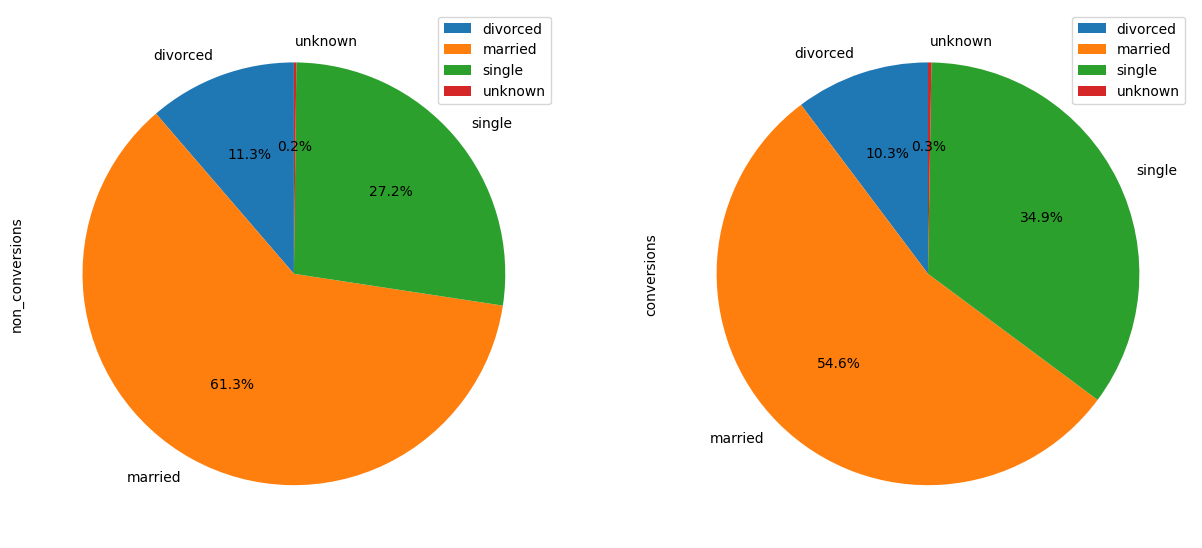

In [74]:
conversions_by_marital_status_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

### 問題：轉換與非轉換情況計算 by Education，並繪圖

In [75]:
conversions_by_education_status_df = df.pivot_table(values="y", index="education", columns="conversion", aggfunc="count")
conversions_by_education_status_df.columns = ['non_educated', 'educated']
conversions_by_education_status_df

,non_educated,educated
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


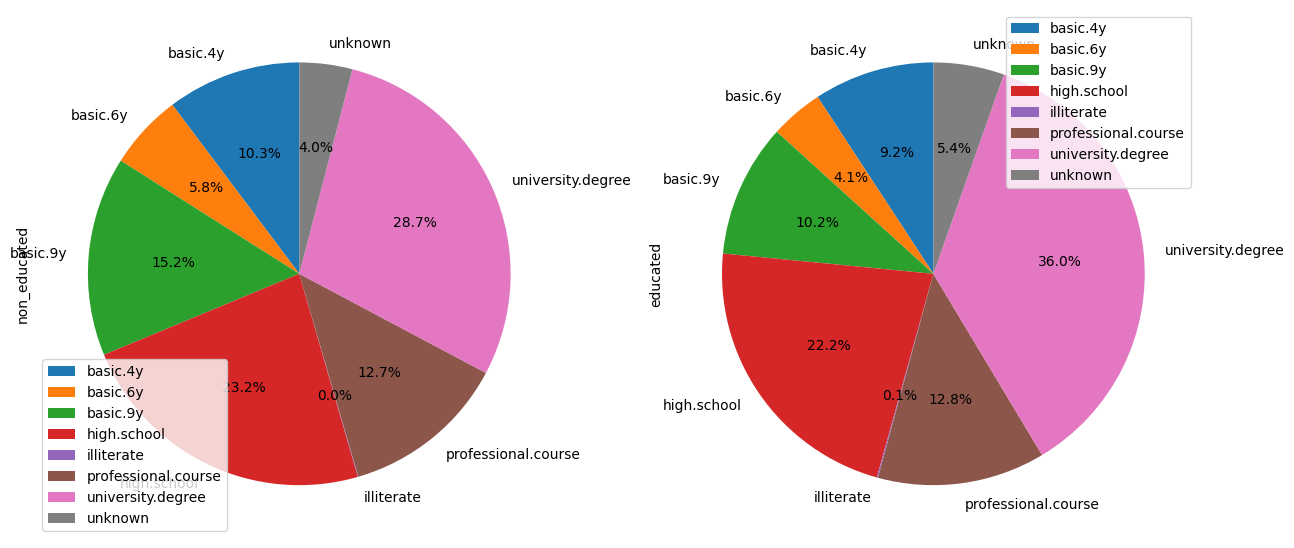

In [76]:
conversions_by_education_status_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

## 轉換率計算 by 年紀組別與婚姻

In [86]:
age_marital_df = df.pivot_table(values='conversion', index='age_group', columns='marital', aggfunc="sum", observed=True)
age_marital_df = age_marital_df.truediv(df.groupby('age_group', observed=True)['conversion'].count(), axis='index')

age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
"(16.919, 44.0]",0.007433,0.048029,0.053656,0.000248
"(44.0, 71.0]",0.016395,0.084202,0.007959,0.000398
"(71.0, 98.0]",0.162602,0.317073,0.010840,NaN


### 堆疊

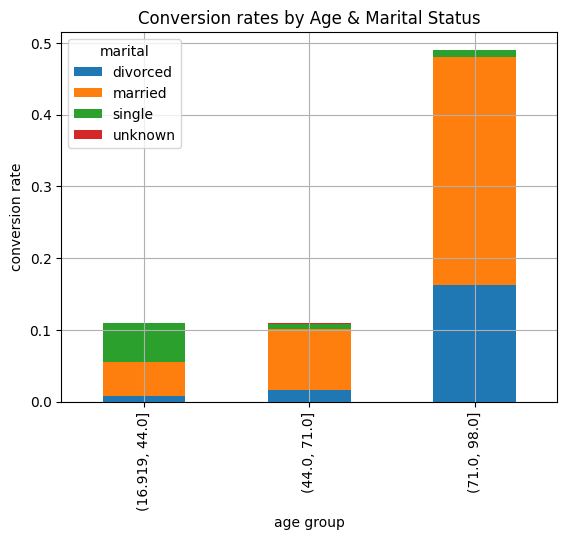

In [87]:
age_marital_df.plot(
    kind='bar',
    grid=True,
    stacked=True
)

plt.title('Conversion rates by Age & Marital Status')
plt.xlabel('age group')
plt.ylabel('conversion rate')

plt.show()

## 非堆疊

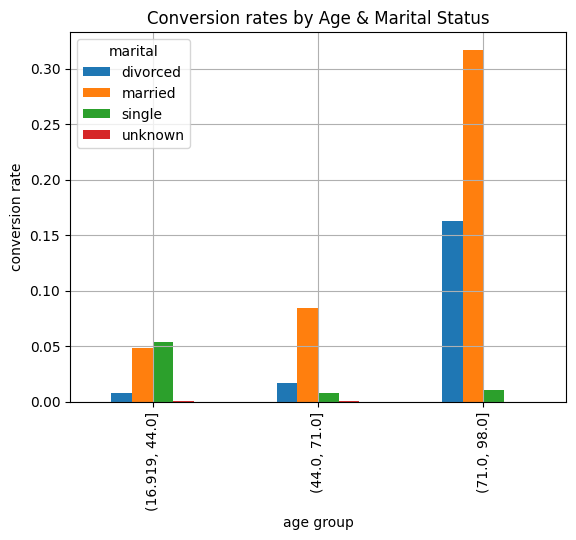

In [88]:
age_marital_df.plot(
    kind='bar',
    grid=True,
)

plt.title('Conversion rates by Age & Marital Status')
plt.xlabel('age group')
plt.ylabel('conversion rate')

plt.show()